In [64]:
import pandas as pd
import numpy as np
from scipy.linalg import diagsvd
import matplotlib.pyplot as plt
import os

In [65]:
os.chdir('/Users/sosuke/Downloads')

In [119]:
# X and Y are datasets

X = pd.read_csv('p9X.csv')
Y = pd.read_csv('p9Y.csv')

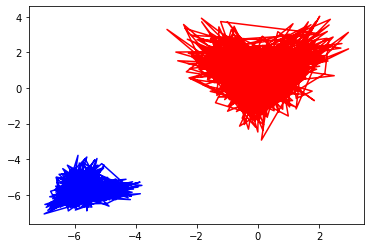

In [190]:
plt.plot(Y.values[:, 0], Y.values[:, 1], 'b')
plt.plot(X.values[:, 0], X.values[:, 1], 'r')

In [200]:
def procrustes(A, X):
    '''
    Given a matrix X and A, return a matrix Q that minimizes the Frobenius norm of X-AQ
    '''
    
    u, s, v = np.linalg.svd(np.dot(np.transpose(A), X), full_matrices=False, compute_uv=True)
    
    return np.dot(u, v)

In [203]:
Q = procrustes(Y, X)
Q

array([[ 0.70632669, -0.70788601],
       [-0.70788601, -0.70632669]])

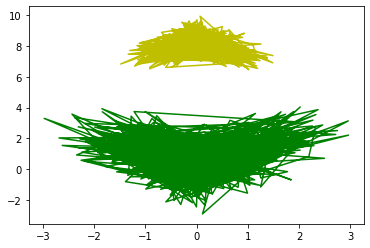

In [204]:
YQ = np.dot(Y, Q)
plt.plot(YQ[:, 0], YQ[:, 1], 'y')
plt.plot(X.values[:, 0], X.values[:, 1], 'g')

In the plot in (c), we can see that the two matrices look similar, as $YQ$ looks like a small version of X rotated 180 degrees.

The errror $\|X-YQ\|_F = \sqrt{tr((X-YQ)^T(X-YQ))}$ is given by

In [208]:
np.trace(np.dot(np.transpose(X-YQ), X-YQ))**0.5

237.39347824942135